<a href="https://colab.research.google.com/github/IrinaBolshagina/Comics/blob/main/3.Generating_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I generate comic book style images using image-to-image [Stable Diffusion](https://huggingface.co/stabilityai/sdxl-turbo) model

1. Create a pipleline for stable diffusion
2. Create a prompt
3. Put prompt and initial image into pipeline to get generated pictures

In [ ]:
!pip install diffusers transformers accelerate --upgrade

In [ ]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch
import requests
from PIL import Image
import torch

In [ ]:
img_urls = [
    'https://expertphotography.b-cdn.net/wp-content/uploads/2022/06/Birthday-Photoshoot-Ideas-surprise.jpg',
    'https://img.freepik.com/free-photo/indoor-portrait-amazing-female-model-trendy-t-shirt-touching-her-long-shiny-hair_197531-6512.jpg',
    'https://expertphotography.b-cdn.net/wp-content/uploads/2022/06/Birthday-Photoshoot-Ideas-pool-party.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQEWGvDGqJ4FvpuUWT0PXxgoY9utJd-GtR9A&usqp=CAU',
    'https://play-lh.googleusercontent.com/on623rjZr4fRqI1YCTfOthkLzS6RSTJY5WhGWj9iO5EpWJDWNnmBuW_dcreZVoyx4Q'

]

img_descriptions = [
    'a man in a suit and tie is dancing with his friends',
    'a woman in a white shirt and black pants with red hearts',
    'a woman in a pink flamingo swimsuit sitting on an inflatable',
    'a man standing on a bridge',
    'a man riding a horse'
]

In [ ]:
def download_images_from_urls(urls):
    images = []
    for url in urls:
        response = requests.get(url)
        img = Image.open(requests.get(url, stream=True).raw).convert('RGB')
        images.append(img.resize((4096, 4096)))
    return images


In [ ]:
def load_images(urls):
  images = []
  for url in urls:
    images.append(load_image(url))
  return images

In [ ]:
downloaded_images = download_images_from_urls(img_urls)

##1. Create a pipleline for stable diffusion

In [ ]:
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLImg2ImgPipeline {
  "_class_name": "StableDiffusionXLImg2ImgPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "requires_aesthetics_score": false,
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## 2. Generate one image

In [ ]:
prompt_marvel = "Comic book illustration marvel style, vibrant, colofull"
prompt_manga = "Japanese manga style, thick paint style, simple background"
prompt_retro = "Retro style comic book illustration, monochrome, highly detaled, black and white, sleek and glamorous"
negative_prompt="ugly, deformed, disfigured, poor details, bad anatomy"

  0%|          | 0/6 [00:00<?, ?it/s]

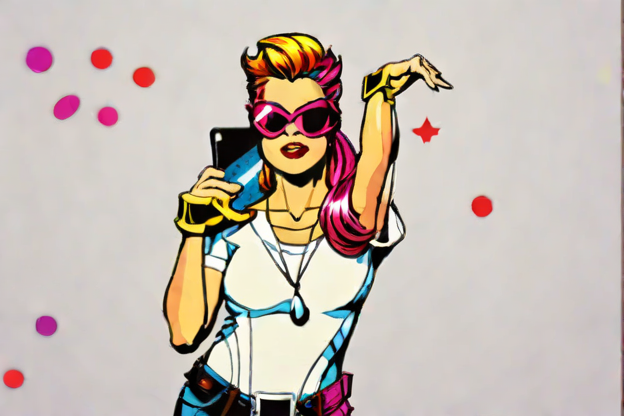

  0%|          | 0/6 [00:00<?, ?it/s]

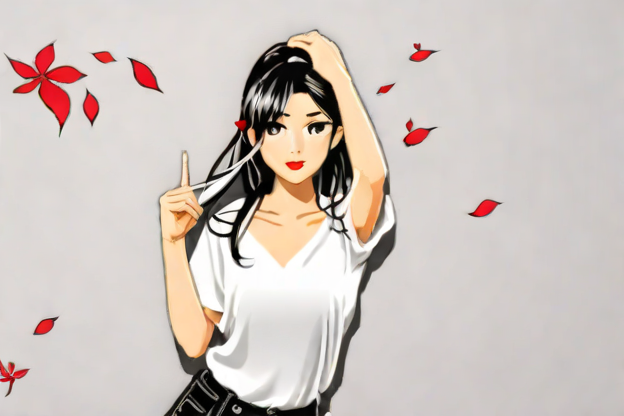

  0%|          | 0/6 [00:00<?, ?it/s]

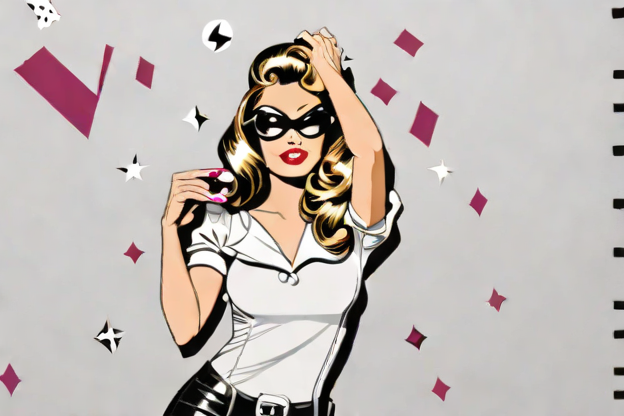

In [ ]:
init_image = load_image("https://img.freepik.com/free-photo/indoor-portrait-amazing-female-model-trendy-t-shirt-touching-her-long-shiny-hair_197531-6512.jpg")
image1 = pipe(prompt_marvel, image=init_image, num_inference_steps=12, strength=0.5, guidance_scale=5.0, negative_prompt = negative_prompt).images[0]
display(image1)
image2 = pipe(prompt_manga, image=init_image, num_inference_steps=12, strength=0.5, guidance_scale=5.0, negative_prompt = negative_prompt).images[0]
display(image2)
image3 = pipe(prompt_retro, image=init_image, num_inference_steps=12, strength=0.5, guidance_scale=5.0, negative_prompt = negative_prompt).images[0]
display(image3)

## 3. Generate several images and create a list

In [ ]:
def generate_images(img_list, prompt, img_descriptions):
  gen_img_list = []
  for init_image, description in zip(img_list, img_descriptions):
    image = pipe(description + ', ' + prompt, image=init_image, num_inference_steps=3, strength=0.7, guidance_scale=0.0, negative_prompt=negative_prompt).images[0]
    gen_img_list.append(image)
  return gen_img_list

In [ ]:
generated_images = generate_images(downloaded_images, prompt_marvel, img_descriptions)
for img in generated_images:
  display(img)

OutOfMemoryError: CUDA out of memory. Tried to allocate 8.00 GiB. GPU 0 has a total capacity of 14.75 GiB of which 7.07 GiB is free. Process 155926 has 7.67 GiB memory in use. Of the allocated memory 7.11 GiB is allocated by PyTorch, and 436.98 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)